In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  lsd.csv

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

TC: Tissue Concentration

SCORE: Math Score


In [19]:
# Read the csv file into a pandas DataFrame
lsd = pd.read_csv('../Resources/lsd.csv')
lsd.head()

,tc,score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [29]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = lsd.tc.values.reshape(-1, 1)
y = lsd.score.values

print("Shape: ", X.shape, y.shape)

Shape:  (7, 1) (7,)


In [30]:
X

array([[1.17],
       [2.97],
       [3.26],
       [4.69],
       [5.83],
       [6.  ],
       [6.41]])

In [31]:
y

array([78.93, 58.2 , 67.47, 37.47, 45.65, 32.92, 29.97])

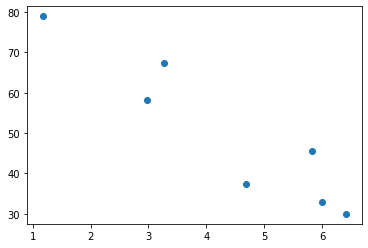

In [21]:
# Plot the data
plt.scatter(X, y)

In [22]:
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
# Fit the model to the data. 
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-9.00946642]
y-axis intercept:  89.12387376799308


In [32]:
y_pred = model.predict(X)

### Plot the regression line

In [25]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1.17]]
Max X Value: [[6.41]]


In [26]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

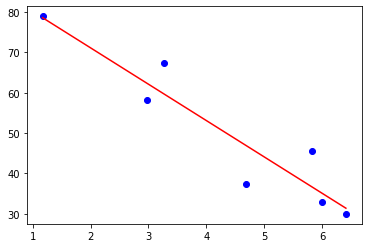

In [27]:
# Plot X and y using plt.scatter
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')